# Adrian Kamiński
## Praca domowa 1

In [1]:
import pandas as pd
import numpy as np

import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('allegro-api-transactions.csv')

In [3]:
df

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


# 1. Kodowanie zmiennych kategorycznych

In [4]:
encoder = ce.TargetEncoder()
df_encoded = encoder.fit_transform(df[['it_location']], df.price).assign(prev_it_location = df[['it_location']])
print('Unique before encoding: ', df_encoded.prev_it_location.unique().size)
print('Unique after encoding: ', df_encoded.it_location.unique().size)

Unique before encoding:  10056
Unique after encoding:  6283


Target vs one-hot
- Target lepszy w przypadku dużej ilościu unikatowych wartości w kolumnie (nie powstaje 10000+ kolumn z większością 0)
- Target encoder przyjmuje jako parametr target jedną kolumnę, w przypadku naszym zadaniem jest określenie wartości z wielu kolumn musielibyśmy wykonać target encoding dla każdego targetu oddzielnie, co nie było by konieczne przy one-hot

In [5]:
to_encode = ['main_category']

### One Hot Encoder

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
ohc_encoder = OneHotEncoder()

In [8]:
enc_df = pd.DataFrame(
    ohc_encoder.fit_transform(df[to_encode]).toarray(),
    columns = ohc_encoder.get_feature_names(input_features = to_encode)
)
    
df[to_encode].join(enc_df)

,main_category,main_category_Antyki i Sztuka,main_category_Bilety,main_category_Biuro i Reklama,main_category_Biżuteria i Zegarki,main_category_Delikatesy,main_category_Dla Dzieci,main_category_Dom i Ogród,main_category_Filmy,main_category_Fotografia,...,main_category_Nieruchomości,"main_category_Odzież, Obuwie, Dodatki",main_category_Przemysł,main_category_RTV i AGD,main_category_Rękodzieło,main_category_Sport i Turystyka,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Telefony i Akcesoria,main_category_Uroda,main_category_Zdrowie
0,Komputery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dom i Ogród,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Książki i Komiksy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,RTV i AGD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
420016,Uroda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
420017,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420018,Dla Dzieci,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.main_category.unique().size

27

One Hot Encoder zamienia każdą unikalną wartość w kodowanej kolumnie na nową kolumnę która przyjmuję 0 jeśli w tym wierszu dana wartość wystąpiła i 0 w przeciwnym wypadku.
W przypadku wielu unikalnych wartości użycie tego kodowania może skończyć się na stworzeniu wielu nowych kolumn które trzymają prawie same zera.

### Ordinal Encoder

In [10]:
encoder = ce.ordinal.OrdinalEncoder()

In [11]:
encoder.fit_transform(df[to_encode]).assign(prev_main_category = df[to_encode])

,main_category,prev_main_category
0,1,Komputery
1,2,"Odzież, Obuwie, Dodatki"
2,3,Dom i Ogród
3,4,Książki i Komiksy
4,2,"Odzież, Obuwie, Dodatki"
...,...,...
420015,6,RTV i AGD
420016,9,Uroda
420017,2,"Odzież, Obuwie, Dodatki"
420018,8,Dla Dzieci


Ordinal Encoder przyporządkowywuje każdej unikalnej zmiennej kolejną liczbę naturalną.
Nadaję w ten sposób pewien porządek, hierarchie, przez co użwając tego encodera w przypadu danych nominalnych tworzymy sztuczną hierarchie (nie powinniśmy tego robić).

### Sum Encoder

In [12]:
encoder = ce.sum_coding.SumEncoder()

In [13]:
encoder.fit_transform(df[to_encode], df.price)

,intercept,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420016,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420017,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420018,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.main_category.unique().size

27

Sum Encoder działa podobinie do One Hot Encodera. Różnica jest taka, że powstaje mniej kolumn (dokładnie 1 mniej, nie licząc intercept), ponieważ jedna wartość przyjmuję w tych wszystkich stworzonych kolumnach -1 (czyli suma każdej z powstałych kolumn jest równa 0).

# 2. Uzupełnianie braków z użyciem *Nearest neighbors imputation*

In [15]:
df = df.sample(len(df)//10).reset_index(drop=True)

In [16]:
df2 = df[[
    'price', 'it_seller_rating', 'it_quantity'
]]

In [17]:
import random
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error as mse

In [18]:
def removeReplaceAndRMSE(df2, imputer, cols_to_remove = ['it_seller_rating'], frac = 10):
    df2_with_nans = df2.copy(deep=True)
    # add nan to frac% of values in given columns
    for col in cols_to_remove:
        random_indexes = np.random.choice(len(df2_with_nans), len(df2_with_nans)//frac)
        df2_with_nans.loc[random_indexes, cols_to_remove] = np.nan
    
    df2_imputed = df2_with_nans.copy(deep = True)
    df2_imputed = pd.DataFrame(imputer.fit_transform(df2_imputed), columns = df2_imputed.columns)
    
    return mse(df2_imputed, df2, squared = False)

In [19]:
imputer = KNNImputer()

## Uzupełnianie braków z jednej kolumny

In [20]:
results_1 = []

In [21]:
for i in range(10):
    results_1.append(removeReplaceAndRMSE(df2, imputer))

In [22]:
print(f"""
Średnia z RMSE wynoski: {np.mean(results_1):.2f}\n
Odchylenie standardowe z RMSE wyników wynosi: {np.std(results_1):.2f}
""")


Średnia z RMSE wynoski: 3899.50

Odchylenie standardowe z RMSE wyników wynosi: 94.29



## Uzupełnianie braków z dwóch kolumn

In [23]:
results_2 = []

In [24]:
for i in range(10):
    results_2.append(removeReplaceAndRMSE(df2, imputer, ['it_seller_rating', 'it_quantity']))

In [25]:
print(f"""
Średnia z RMSE wynoski: {np.mean(results_2):.2f}\n
Odchylenie standardowe z RMSE wyników wynosi: {np.std(results_2):.2f}
""")


Średnia z RMSE wynoski: 9030.82

Odchylenie standardowe z RMSE wyników wynosi: 99.11



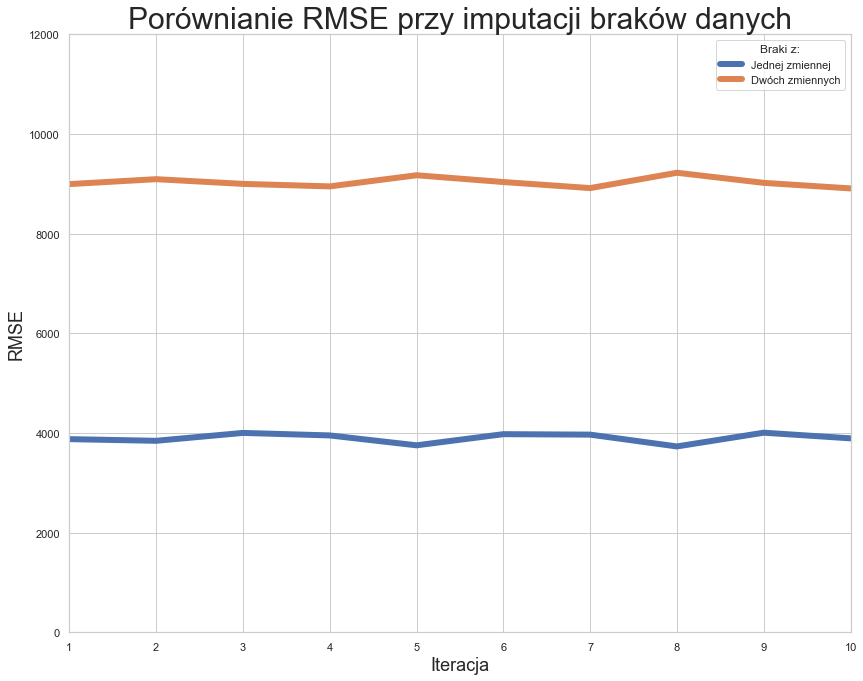

In [28]:
ax = sns.lineplot(x = np.arange(1, 11), y = results_1, linewidth=6)
ax = sns.lineplot(x = np.arange(1, 11), y = results_2, linewidth=6)

sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("whitegrid")

ax.set(ylim=(0, 12000))
ax.set(xlim=(1, 10))
ax.set_title("Porównianie RMSE przy imputacji braków danych", size = 30)
ax.set_xlabel("Iteracja", size = 18)
ax.set_ylabel("RMSE", size = 18)
ax.legend(title = 'Braki z:', labels=["Jednej zmiennej", "Dwóch zmiennych"])

plt.show()

Widzimy, że błedy są w duże (choć zmieniają się o nie wiele w kolejnych iteracjach) i zależność pomiędzy wzrostem liczby brakujących danych, a błędem RMSE jest liniowa.